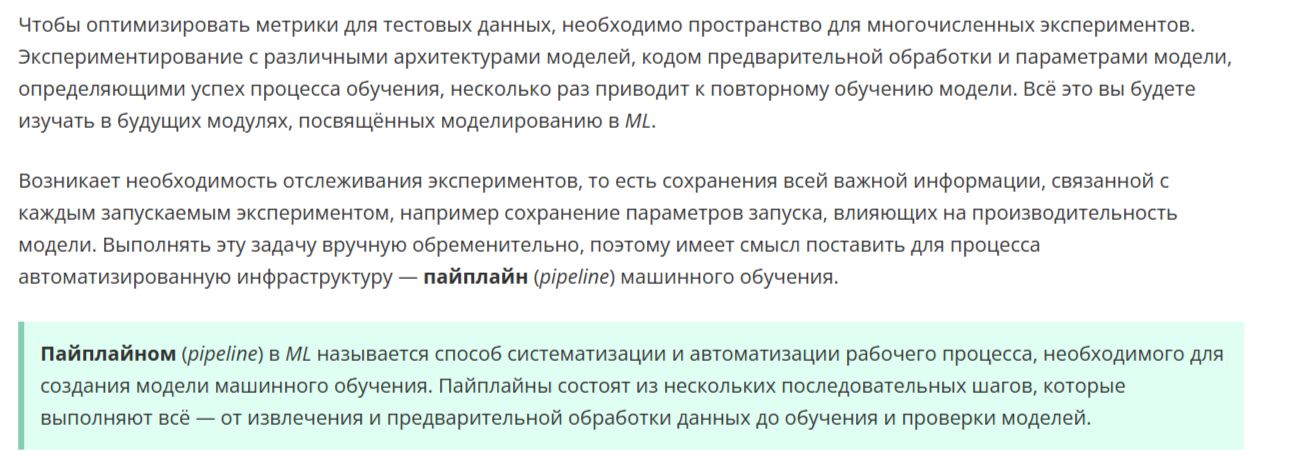

In [ ]:
import comet_ml
from comet_ml import Experiment

DEBUG: 2025-09-03 14:01:48,810: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/11" 200 67


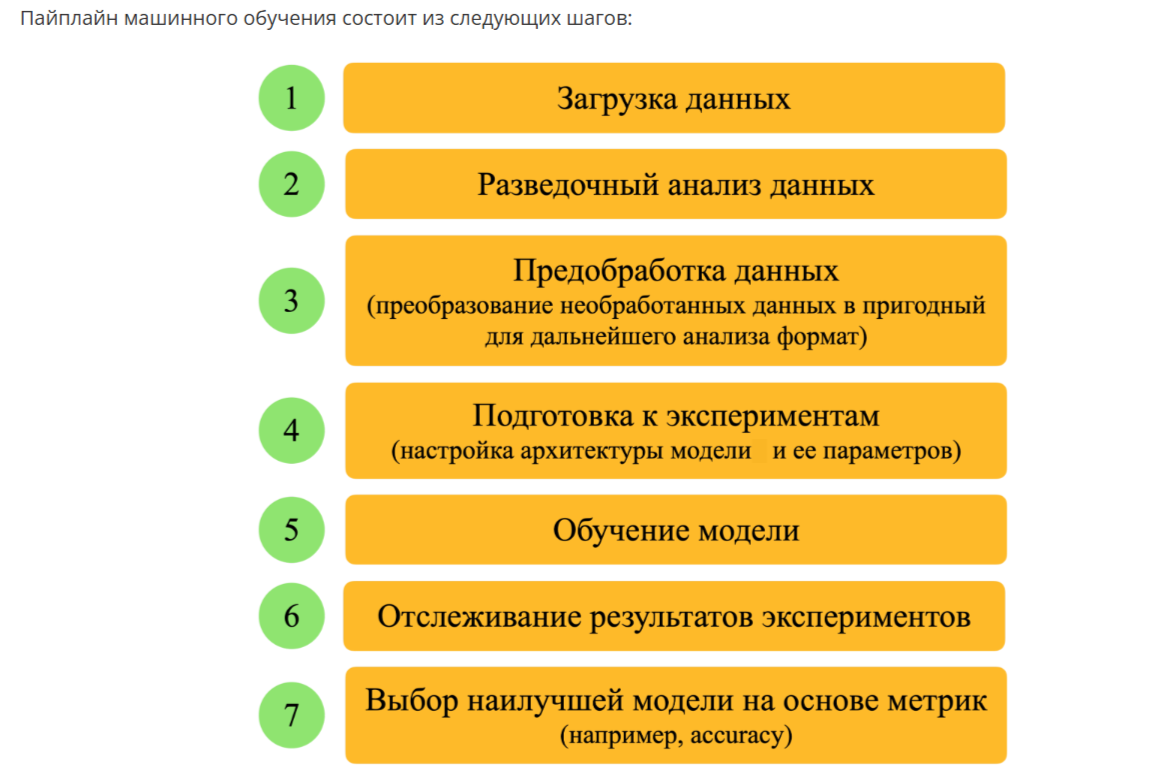

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [40]:
df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


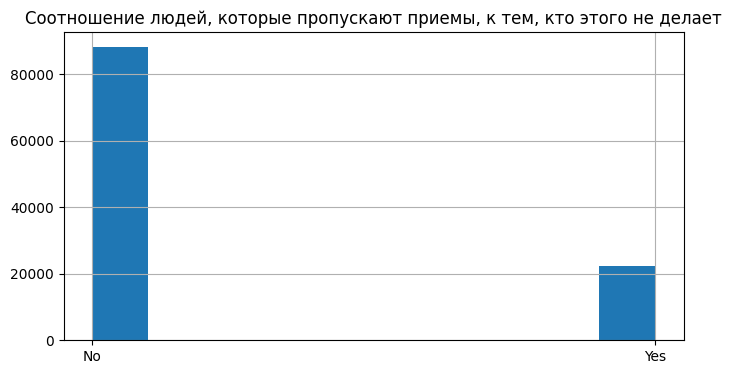

In [41]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [42]:
df['No-show'].value_counts(True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

In [43]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

In [44]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

In [45]:
encoded_columns

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
110523,3.596266e+12,5650093,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
110524,1.557663e+13,5630692,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
110525,9.213493e+13,5630323,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [46]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

data = pd.DataFrame({'животное': ['кошки', 'собаки', 'птицы', 'собаки']})
display(data)
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['животное']])

,животное
0,кошки
1,собаки
2,птицы
3,собаки


In [47]:
encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [48]:
from sklearn.preprocessing import OrdinalEncoder

data = pd.DataFrame({'уровень': ['низкий', 'средний', 'высокий', 'средний']})
display(data)
encoder = OrdinalEncoder(categories=[['низкий', 'средний', 'высокий']])
encoded = encoder.fit_transform(data[['уровень']])

,уровень
0,низкий
1,средний
2,высокий
3,средний


In [49]:
encoded

array([[0.],
       [1.],
       [2.],
       [1.]])

In [50]:
import category_encoders as ce

data = pd.DataFrame({'животное': ['кошки', 'собаки', 'птицы', 'рыбы', 'собаки']})
display(data)
encoder = ce.BinaryEncoder(cols=['животное'])
encoded = encoder.fit_transform(data)

,животное
0,кошки
1,собаки
2,птицы
3,рыбы
4,собаки


In [51]:
encoded

,животное_0,животное_1,животное_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,0,1,0


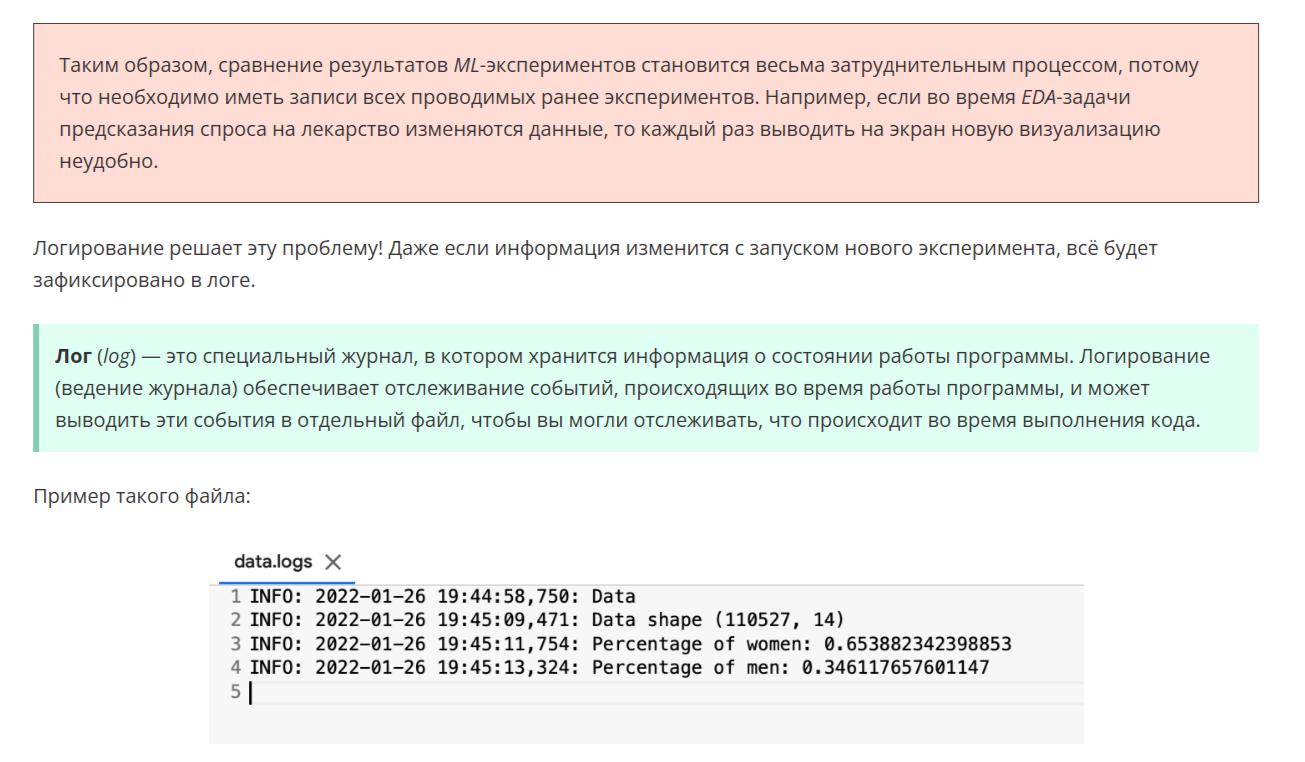

In [52]:
import logging

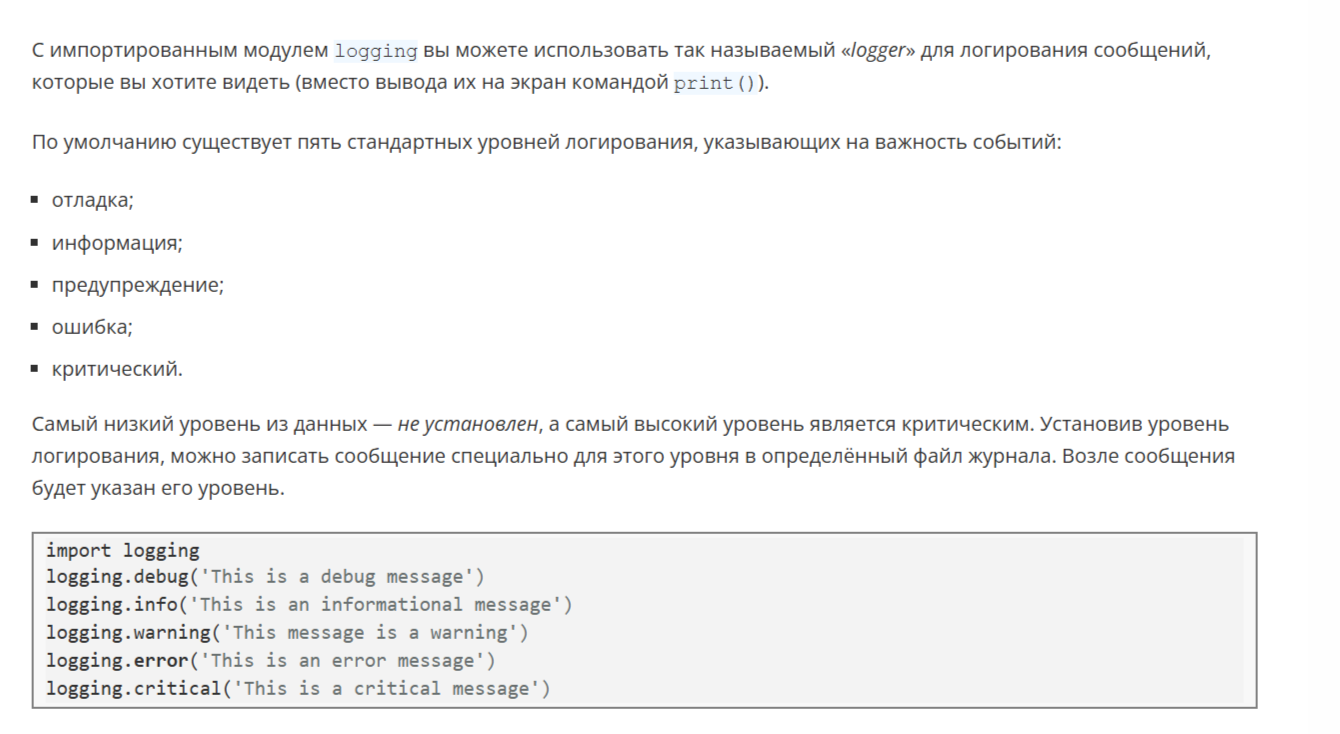

In [53]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG: 2025-09-03 14:01:49,934: This is a debug message
INFO: 2025-09-03 14:01:49,936: This is an informational message
ERROR: 2025-09-03 14:01:49,941: This is an error message
CRITICAL: 2025-09-03 14:01:49,943: This is a critical message


In [54]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from 'c:\\Users\\user\\anaconda3\\Lib\\logging\\__init__.py'>

In [55]:
logging.basicConfig(level=logging.DEBUG)

In [56]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [57]:
logging.FileHandler('log_file.log')

<FileHandler c:\Users\user\Desktop\Skilfactory\log_file.log (NOTSET)>

In [58]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2025-09-03 14:01:51,068: Check


In [59]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

In [60]:
!mkdir logs

�������� ��� 䠩� logs 㦥 �������.


In [61]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2025-09-03 14:01:51,260: Data
INFO: 2025-09-03 14:01:51,262: Data shape (110527, 14)
C:\Users\user\AppData\Local\Temp\ipykernel_12380\2576330178.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2025-09-03 14:01:51,280: Percentage of women: 0.653882342398853
DEBUG: 2025-09-03 14:01:51,290: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/11" 200 67
C:\Users\user\AppData\Local\Temp\ipykernel_12380\2576330178.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: 

DEBUG: 2025-09-03 14:01:51,303: Resetting dropped connection: www.comet.com


In [62]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2025-09-03 14:01:51,308: Data shape is incorrect!


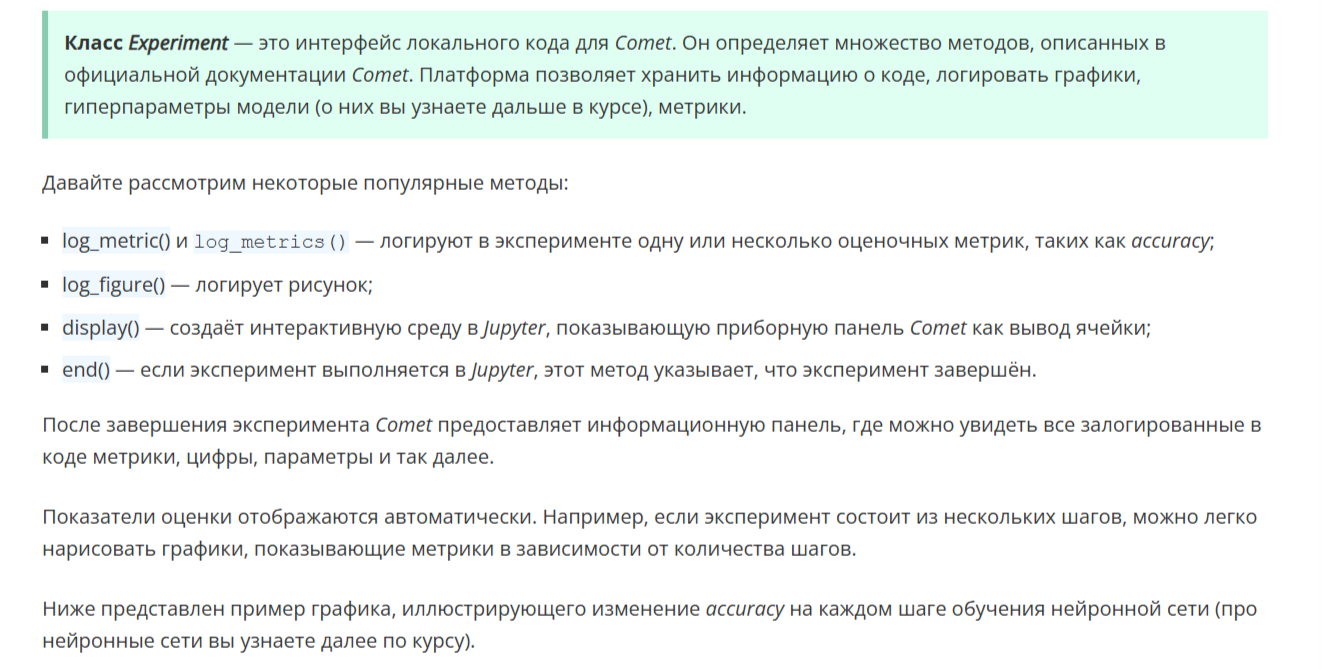

In [63]:


# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="L0a3OqGI9QAw3PgJJ8JdI9p5A",
    project_name="medical-appointment",
    workspace="alexkoshin",
)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn.
DEBUG: 2025-09-03 14:01:51,384: https://o168229.ingest.us.sentry.io:443 "POST /api/4505505645330432/envelope/ HTTP/11" 200 0
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : parental_sparrow_5361
COMET INFO:     url                   : https://www.comet.com/alexkoshin/medical-appointment/581eade78eb44b3e85e2bed98a060612
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INF

DEBUG: 2025-09-03 14:01:54,299: https://www.comet.com:443 "POST /api/rest/v2/write/experiment/file-path HTTP/11" 200 55
DEBUG: 2025-09-03 14:01:54,441: https://www.comet.com:443 "POST /clientlib/rest/v2/write/experiment/system-details HTTP/11" 200 55
DEBUG: 2025-09-03 14:01:54,589: https://www.comet.com:443 "POST /clientlib/rest/v2/write/experiment/system-details HTTP/11" 200 55
DEBUG: 2025-09-03 14:01:54,733: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/parameter HTTP/11" 200 55
DEBUG: 2025-09-03 14:01:54,879: https://www.comet.com:443 "POST /api/rest/v2/write/experiment/git/metadata HTTP/11" 200 55
DEBUG: 2025-09-03 14:01:54,894: Starting new HTTPS connection (1): www.comet.com:443
DEBUG: 2025-09-03 14:01:55,019: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/11" 200 55
DEBUG: 2025-09-03 14:01:55,665: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/11" 200 67
DEBUG: 2025-09-03 14:01:56,559: https://www.comet.com:443 "PO

In [64]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : gigantic_laboratory_3548
COMET INFO:     url                   : https://www.comet.com/alexkoshin/medical-appointment/766003e580ac4d0eb50a6369228df24e
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (580.02 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code    